# 🎯 Recommendation Engine - Complete ML/DL Pipeline

This notebook demonstrates the **complete recommendation system** using:
- **SBERT** for semantic embeddings
- **ESCO taxonomy** for skill mapping
- **Hybrid ranking** (semantic + rule-based)

## What You'll Learn:
1. How SBERT embeddings work
2. Skill gap analysis algorithm
3. Course recommendation ranking
4. Career path generation
5. Mentor matching with ML

## 1. Setup & Load Engine

In [1]:
import sys
sys.path.append('../scripts')

from recommendation_engine import RecommendationEngine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

print("✅ Imports successful")

✅ Imports successful


In [2]:
# Initialize the recommendation engine
print("Loading RecommendationEngine (this may take 30-60 seconds)...\n")

engine = RecommendationEngine(
    jobs_path="../data/processed/all_jobs_master.csv",
    courses_path="../data/processed/all_courses_master.csv",
    esco_dir="../data/raw/esco",
    show_progress=True
)

print("\n✅ Engine loaded successfully!")

Loading RecommendationEngine (this may take 30-60 seconds)...



Merging synthetic jobs (synthetic_jobs.csv)...
Loaded 50 mentors.
Loaded 122 career progression paths.
Building market skill index...
Indexed 14 unique market skills.
Loading pre-computed ESCO embeddings from c:\Users\User\Desktop\Second Year Stuff\sdgp\PathFinder+\Adjusted_Scraper\project_root\Machine Learning and Data Cleaning\notebooks\..\models\esco_occ_embeddings.pt
Loading pre-computed course embeddings from c:\Users\User\Desktop\Second Year Stuff\sdgp\PathFinder+\Adjusted_Scraper\project_root\Machine Learning and Data Cleaning\notebooks\..\models\course_embeddings_all_courses_master.pt
Loading pre-computed Job embeddings from c:\Users\User\Desktop\Second Year Stuff\sdgp\PathFinder+\Adjusted_Scraper\project_root\Machine Learning and Data Cleaning\notebooks\..\models\job_embeddings.pt
Loaded 378 salary profiles from Paylab.

✅ Engine loaded successfully!


## 2. Explore SBERT Embeddings

**SBERT** converts text → 384-dimensional vectors

In [3]:
# Example: Encode a job title
job_title = "Senior Software Engineer"
embedding = engine.model.encode(job_title)

print(f"Job Title: {job_title}")
print(f"Embedding shape: {embedding.shape}")
print(f"\nFirst 10 dimensions: {embedding[:10]}")

Job Title: Senior Software Engineer
Embedding shape: (384,)

First 10 dimensions: [-0.04239082  0.06008056  0.00897107 -0.02252997 -0.02961464 -0.10696708
  0.01599052  0.05862539 -0.04980511 -0.01697271]


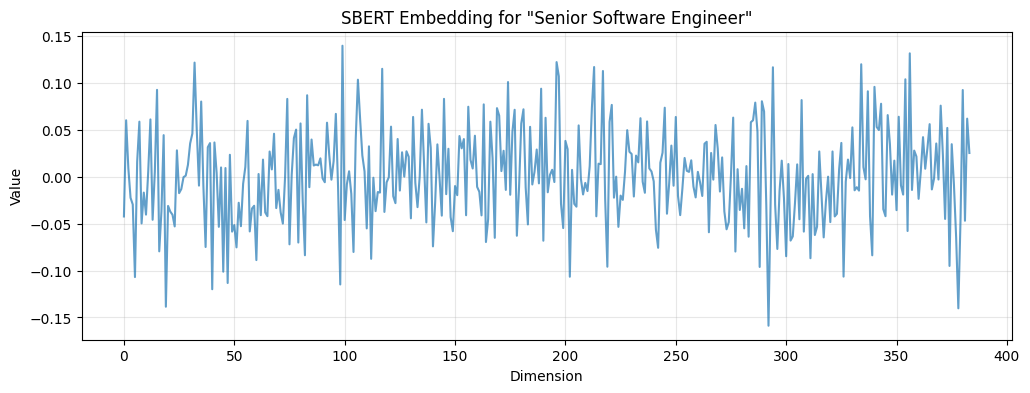

In [4]:
# Visualize embedding distribution
plt.figure(figsize=(12, 4))
plt.plot(embedding, alpha=0.7)
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.title(f'SBERT Embedding for "{job_title}"')
plt.grid(True, alpha=0.3)
plt.show()

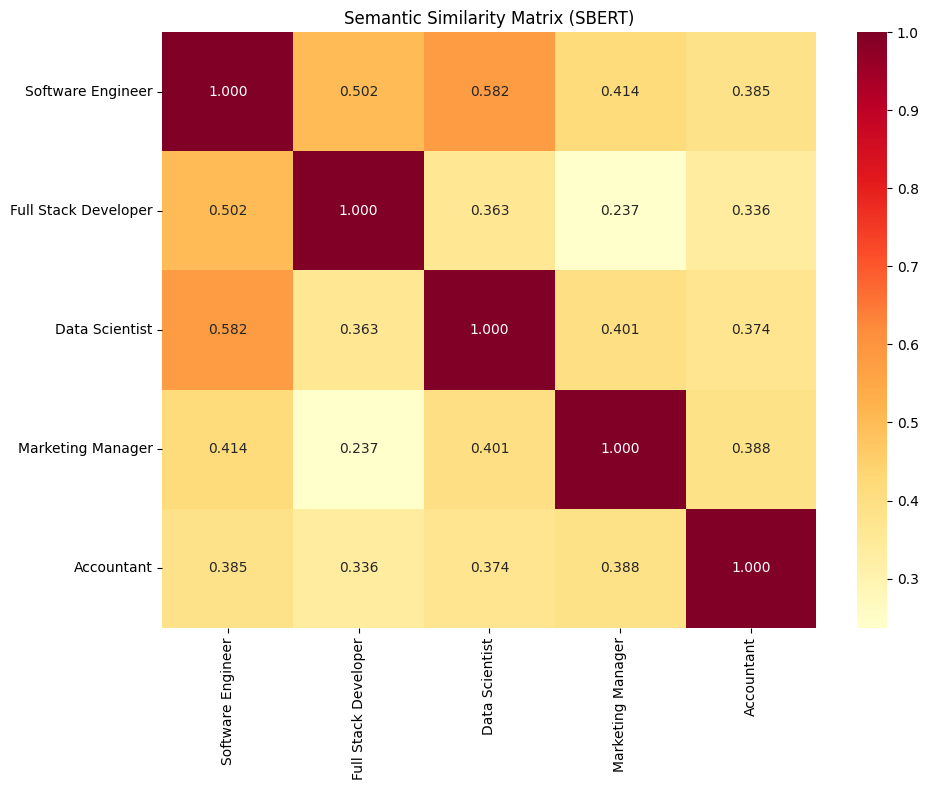

Notice: 'Software Engineer' and 'Full Stack Developer' have high similarity!


In [5]:
# Compare semantic similarity
from sentence_transformers import util

jobs = [
    "Software Engineer",
    "Full Stack Developer",
    "Data Scientist",
    "Marketing Manager",
    "Accountant"
]

embeddings = engine.model.encode(jobs)
similarities = util.cos_sim(embeddings, embeddings)

# Plot similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarities.numpy(),
    annot=True,
    fmt='.3f',
    xticklabels=jobs,
    yticklabels=jobs,
    cmap='YlOrRd'
)
plt.title('Semantic Similarity Matrix (SBERT)')
plt.tight_layout()
plt.show()

print("Notice: 'Software Engineer' and 'Full Stack Developer' have high similarity!")

## 3. Skill Gap Analysis

In [6]:
# Get required skills for a target job
target_job = "DevOps Engineer"

required_skills, esco_mapping = engine.get_skills_for_job(target_job)

print(f"Target Job: {target_job}")
print(f"ESCO Mapping: {esco_mapping}")
print(f"\nRequired Skills ({len(required_skills)}):")
for i, skill in enumerate(required_skills[:15], 1):
    print(f"  {i}. {skill}")

Target Job: DevOps Engineer
ESCO Mapping: cloud DevOps engineer 

Required Skills (12):
  1. design database in the cloud
  2. cloud security and compliance
  3. JavaScript
  4. system backup best practice
  5. plan migration to cloud
  6. develop with cloud services
  7. design cloud architecture
  8. deploy cloud resource
  9. software frameworks
  10. do cloud refactoring
  11. manage disaster recovery plans
  12. design cloud networks


In [7]:
# Calculate skill gap for a user
user_skills = ["Python", "Git", "Linux", "AWS"]

required_set = set(s.lower() for s in required_skills)
user_set = set(s.lower() for s in user_skills)

skill_gap = list(required_set - user_set)

print(f"User Skills: {user_skills}")
print(f"\nSkill Gap ({len(skill_gap)} skills):")
for i, skill in enumerate(skill_gap[:10], 1):
    print(f"  {i}. {skill}")

User Skills: ['Python', 'Git', 'Linux', 'AWS']

Skill Gap (12 skills):
  1. design database in the cloud
  2. cloud security and compliance
  3. system backup best practice
  4. plan migration to cloud
  5. develop with cloud services
  6. design cloud architecture
  7. deploy cloud resource
  8. software frameworks
  9. do cloud refactoring
  10. manage disaster recovery plans


In [8]:
# # Visualize skill gap
# from matplotlib_venn import venn2

# plt.figure(figsize=(10, 6))
# venn2(
#     [required_set, user_set],
#     set_labels=('Required Skills', 'User Skills')
# )
# plt.title(f'Skill Gap Analysis for {target_job}')
# plt.show()

## 4. Course Recommendations

In [9]:
# Get course recommendations
result = engine.recommend_courses(
    user_skills=user_skills,
    target_job=target_job,
    segment="Professional",
    max_budget=500000,
    top_n=5
)

print(f"Status: {result['status']}")
print(f"\nTop 5 Course Recommendations:")
print("=" * 80)

for i, course in enumerate(result['recommendations'], 1):
    print(f"\n{i}. {course['course_name']}")
    print(f"   Provider: {course['provider']}")
    print(f"   Level: {course['level']}")
    print(f"   Score: {course['score']:.3f}")
    print(f"   Fee: {course.get('fee', 'N/A')}")

DEBUG: Recommendation Query -> design database in the cloud cloud security and compliance JavaScript system backup best practice
Error loading assessment questions: 0


KeyError: 'status'

In [ ]:
# Visualize recommendation scores
course_names = [c['course_name'][:40] for c in result['recommendations']]
scores = [c['score'] for c in result['recommendations']]

plt.figure(figsize=(12, 6))
plt.barh(range(len(scores)), scores, color='steelblue')
plt.yticks(range(len(scores)), course_names)
plt.xlabel('Recommendation Score')
plt.title('Course Recommendation Scores')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Assessment Processing

In [ ]:
# Simulate a user assessment
assessment = {
    "status": "Working Professional",
    "total_experience": "3-5 years",
    "responsibility_level": "Planned tasks",
    "q7": "Analyzed data and proposed solutions",
    "q8": "Consulted with team before deciding",
    "q9": "Guided junior developers",
    "q10": "Learned new framework quickly",
    "q11": "Proposed process improvements",
    "q13": "Built a microservices architecture with Docker and Kubernetes",
    "q14": "Collaborative team environment",
    "q15": "Reduced deployment time by 50%",
    "q16": "Overcame legacy system constraints",
    "budget_range": "200k-500k",
    "weekly_time": "5-10 hours"
}

# Process assessment into feature vector
vector = engine.process_comprehensive_assessment(assessment)

print("Assessment Feature Vector:")
print("=" * 60)
for key, value in vector.items():
    if key != 'intent_embedding':  # Skip embedding for readability
        print(f"{key}: {value}")

In [ ]:
# Visualize behavioral scores
behavioral_scores = {
    'Problem Solving': vector.get('problem_solving_score', 0),
    'Decision Making': vector.get('decision_making_score', 0),
    'Leadership': vector.get('leadership_score', 0),
    'Adaptability': vector.get('adaptability_score', 0),
    'Initiative': vector.get('initiative_score', 0)
}

plt.figure(figsize=(10, 6))
plt.bar(behavioral_scores.keys(), behavioral_scores.values(), color='coral')
plt.ylabel('Score (0-3)')
plt.title('Behavioral Competency Scores')
plt.ylim(0, 3)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Complete Recommendation Pipeline

In [ ]:
# Get full recommendations from assessment
target_job = "Senior DevOps Engineer"

full_result = engine.get_recommendations_from_assessment(
    assessment_vector=vector,
    target_job=target_job
)

print(f"Target Job: {target_job}")
print(f"\nRecommendation Summary:")
print("=" * 80)
print(f"Status: {full_result['status']}")
print(f"Skill Gap: {', '.join(full_result.get('skill_gap', [])[:5])}")
print(f"Responsibility Band: {full_result.get('band', 'N/A')}")
print(f"\nTop 3 Courses:")

for i, course in enumerate(full_result['recommendations'][:3], 1):
    print(f"\n{i}. {course['course_name']}")
    print(f"   {course['provider']} | {course['level']} | Score: {course['score']:.3f}")

## 7. Career Progression Paths

In [ ]:
# Get career progression suggestions
paths = engine.get_career_progression(
    current_role="DevOps Engineer",
    current_band=vector['responsibility_band'],
    user_skills=vector['extracted_intent_skills'],
    assessment_vector=vector
)

print(f"Career Progression Paths ({len(paths)} options):")
print("=" * 80)

for i, path in enumerate(paths, 1):
    print(f"\n{i}. {path['type'].upper()}: {path['role']}")
    print(f"   Advice: {path.get('advice', 'N/A')}")
    print(f"   Required Skills: {', '.join(path.get('required_skills', [])[:5])}")

## 8. Mentor Matching

In [ ]:
# Match mentors based on skills
mentors = engine.match_mentors(
    user_skills=vector['extracted_intent_skills'],
    top_n=5
)

print(f"Top 5 Mentor Matches:")
print("=" * 80)

for i, mentor in enumerate(mentors, 1):
    print(f"\n{i}. {mentor['name']}")
    print(f"   Specialization: {mentor['specialization']}")
    print(f"   Industry: {mentor.get('industry', 'N/A')}")
    print(f"   Match Score: {mentor['score']:.3f}")
    print(f"   Overlapping Skills: {', '.join(mentor.get('overlapping_skills', [])[:5])}")

In [ ]:
# Visualize mentor match scores
mentor_names = [m['name'] for m in mentors]
match_scores = [m['score'] for m in mentors]

plt.figure(figsize=(10, 6))
plt.barh(range(len(match_scores)), match_scores, color='mediumseagreen')
plt.yticks(range(len(match_scores)), mentor_names)
plt.xlabel('Match Score')
plt.title('Mentor Match Scores (Based on Skill Overlap)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Salary Estimation

In [ ]:
# Get salary estimates for different roles
roles = [
    "Software Engineer",
    "Senior Software Engineer",
    "DevOps Engineer",
    "Data Scientist",
    "Full Stack Developer"
]

print("Salary Estimates (Paylab Data):")
print("=" * 80)

for role in roles:
    salary = engine.get_salary_for_role(role)
    print(f"{role:30s} | {salary}")

## 10. Test Different Personas

In [ ]:
# Test 1: A/L Student
student_assessment = {
    "status": "A/L Student",
    "total_experience": "None",
    "responsibility_level": "Followed instructions",
    "q7": "Followed teacher's guidance",
    "q8": "Asked for help",
    "q9": "Worked alone",
    "q10": "Learned at my own pace",
    "q11": "Completed assignments",
    "q13": "Built a simple website with HTML and CSS",
    "q14": "School environment",
    "q15": "Got good grades",
    "q16": "Time management challenges",
    "budget_range": "< 50k",
    "weekly_time": "10+ hours"
}

student_vector = engine.process_comprehensive_assessment(student_assessment)
student_result = engine.get_recommendations_from_assessment(
    student_vector,
    "Software Engineer"
)

print("A/L Student Recommendations:")
print("=" * 80)
for i, course in enumerate(student_result['recommendations'][:3], 1):
    print(f"{i}. {course['course_name']} ({course['level']})")

In [ ]:
# Test 2: Career Transitioning Professional
transition_assessment = {
    "status": "Working Professional",
    "total_experience": "5+ years",
    "responsibility_level": "Supervised others",
    "q7": "Led problem-solving sessions",
    "q8": "Made strategic decisions",
    "q9": "Managed a team",
    "q10": "Quickly adapted to changes",
    "q11": "Drove innovation",
    "q13": "Managed marketing campaigns but want to transition to tech",
    "q14": "Fast-paced corporate",
    "q15": "Increased ROI by 30%",
    "q16": "Limited technical background",
    "budget_range": "500k+",
    "weekly_time": "5-10 hours"
}

transition_vector = engine.process_comprehensive_assessment(transition_assessment)
transition_result = engine.get_recommendations_from_assessment(
    transition_vector,
    "Data Analyst"
)

print("\nCareer Transition Recommendations:")
print("=" * 80)
for i, course in enumerate(transition_result['recommendations'][:3], 1):
    print(f"{i}. {course['course_name']} ({course['level']})")

## 🎓 Summary: ML/DL Techniques Used

### Deep Learning:
1. **SBERT (Sentence-BERT)**: Pre-trained transformer for semantic embeddings
   - Model: `all-MiniLM-L6-v2`
   - Output: 384-dimensional vectors
   - Use: Job/course semantic search

### Machine Learning:
2. **Cosine Similarity**: Measure semantic closeness
3. **Hybrid Ranking**: Combine semantic scores with rule-based logic
4. **Feature Engineering**: Convert assessment → numerical vector

### NLP:
5. **ESCO Taxonomy**: Standardized skill/occupation mapping
6. **Skill Extraction**: Regex + keyword matching

### Production Optimizations:
7. **Embedding Caching**: Pre-compute and save to `.pt` files
8. **Batch Processing**: Encode multiple items at once
9. **Index Building**: Fast lookup for market skills